In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
path = r"C:\Users\Lenovo\Desktop\Heart-Attack-Analysis-Prediction-Dataset\data\heart.csv"
df = pd.read_csv(path)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.columns


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
df['output'].value_counts()


output
1    165
0    138
Name: count, dtype: int64

In [ ]:
#Descriptions

# cp Chest Pain type chest pain type
#trpbps resting blood pressure (in mm Hg)
#cigs/day cigarettes per day
#chol serum cholestoral in mg/dl
#fbs fasting blood sugar > 120 mg/dl
#restecg resting electrocardiographic results
#thalach maximum heart rate achieved
#output 0= less chance of heart attack 1= more chance of heart attack


In [15]:
df.head()



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

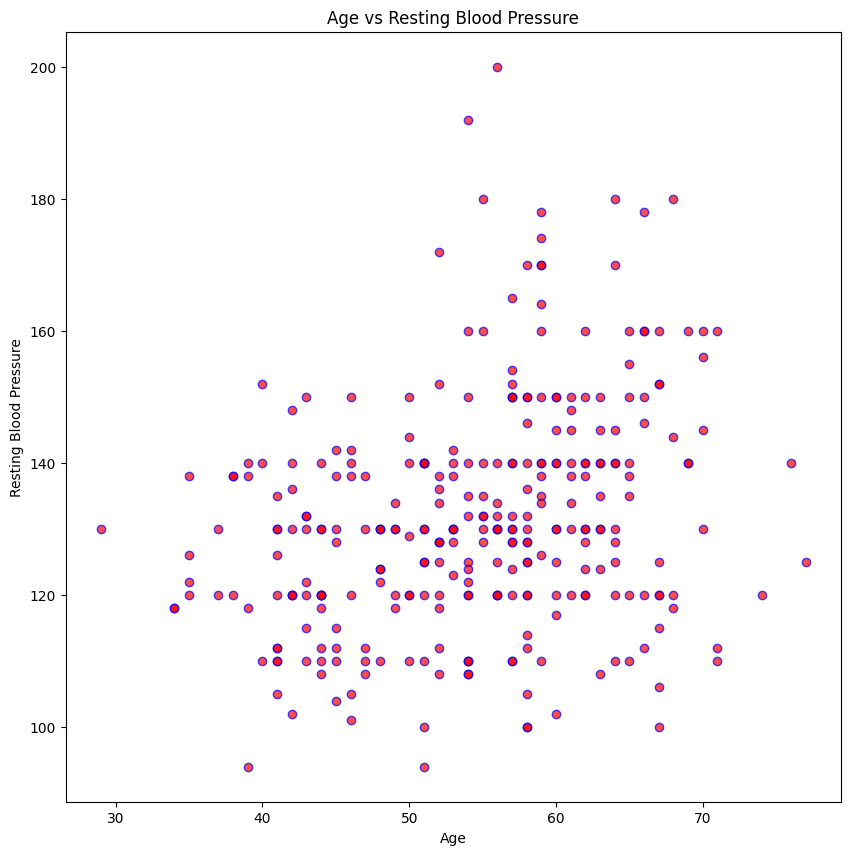

In [20]:
plt.figure(figsize=(10,10))
x_labels = ['age']
y_labels = ['trtbps']
plt.scatter(df['age'],df['trtbps'], edgecolors='b', linewidths=1, marker='o', alpha=0.7, c='r')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('Age vs Resting Blood Pressure')
plt.show()


In [23]:
X = df[['age', 'trtbps', 'chol', 'thalachh']].values
X[0:5]

array([[ 63, 145, 233, 150],
       [ 37, 130, 250, 187],
       [ 41, 130, 204, 172],
       [ 56, 120, 236, 178],
       [ 57, 120, 354, 163]], dtype=int64)

In [26]:
y = df['output'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [25]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389],
       [ 0.18017482, -0.66386682, -0.19835726,  1.23989692],
       [ 0.29046364, -0.66386682,  2.08204965,  0.58393935]])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 4) (242,)
Test set: (61, 4) (61,)


In [32]:
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [33]:
yhat = neigh.predict(X_test)
yhat

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [34]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.7066115702479339
Test set Accuracy:  0.5245901639344263
